In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# 높이 너비 채널 형식의 이미지를 텐서화 채널 높이 너비 형식으로 바꾸기위함
transform = transforms.Compose([
    transforms.ToTensor()
])


In [2]:
train_dataset = datasets.CIFAR10(root = '../data',train=True,download=True,transform=transform)
test_dataset = datasets.CIFAR10(root='../data',train=False,download=True,transform=transform)

train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=True)

100.0%


In [16]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

torch.Size([3, 32, 32])


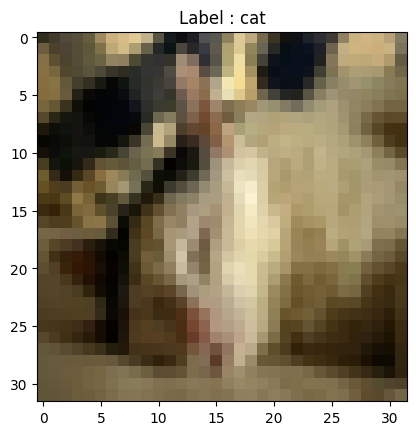

In [ ]:
import matplotlib.pyplot as plt
import random

sample_idx = random.randint(0,len(train_dataset)-1)

img,label = train_dataset[sample_idx]

img_np = img.permute(1,2,0).numpy()

plt.imshow(img_np)
plt.title(f'Label : {train_dataset.classes[label]}')
print(img.shape)


In [ ]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self,input_dim, output_dim):
        super().__init__()

        self.conv1 = nn.Conv2d(3,64,kernel_size=3,stride=1,padding=0)
        self.conv2 = nn.Conv2d(64,64,kernel_size=3,stride=1,padding=0)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=1,padding=0)
        self.dropout1 = nn.Dropout(0.4)
        self.conv3 = nn.Conv2d(64,128,kernel_size=3,stride=1,padding=0)
        self.conv4 = nn.Conv2d(128,128,kernel_size=3,stride=1,padding=0)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=1,padding=0)
        self.dropout2 = nn.Dropout2d(0.4)


        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_dim,1024)
        self.fc2 = nn.Linear(1024,1024)
        self.output = nn.Linear(1024,10)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool1(x)
        x = self.dropout1(x)

        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool2(x)
        x = self.dropout2(x)

        return self.output(x)